In [130]:
import pandas as pd
import numpy as np

In [131]:
df = pd.read_csv(r'C:/Users/Ali/Downloads/Automobile.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [132]:
df.price.replace('?',0, inplace=True)

In [133]:
df['price'] = pd.to_numeric(df['price'])

In [134]:
df.price.replace(0,df.price.mean(), inplace=True)

C:\Users\Ali\.conda\envs\tensor_ali\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

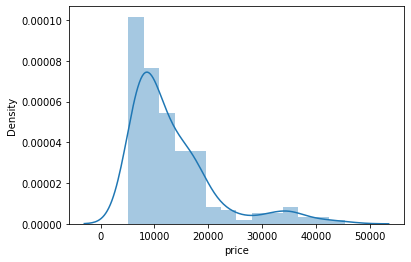

In [135]:
import seaborn as sns
sns.distplot(df.price)

### Cleaning Doors and Normalized loses

In [136]:
df[df['num-of-doors'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148,dodge,gas,turbo,?,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558.0
63,0,?,mazda,diesel,std,?,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795.0


In [137]:
df['num-of-doors'].value_counts()

four    114
two      89
?         2
Name: num-of-doors, dtype: int64

In [138]:
df.loc[(df['num-of-doors'] == '?') , 'num-of-doors' ] = 'four' 

In [139]:
df[df['num-of-doors'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [140]:
df['normalized-losses'].replace('?',0, inplace=True)

In [141]:
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'])
df['normalized-losses'].unique()

array([  0, 164, 158, 192, 188, 121,  98,  81, 118, 148, 110, 145, 137,
       101,  78, 106,  85, 107, 104, 113, 150, 129, 115,  93, 142, 161,
       153, 125, 128, 122, 103, 168, 108, 194, 231, 119, 154,  74, 186,
        83, 102,  89,  87,  77,  91, 134,  65, 197,  90,  94, 256,  95],
      dtype=int64)

In [142]:
pd.pivot_table(data=df , index='body-style', values='normalized-losses', aggfunc= np.mean )

,normalized-losses
body-style,
convertible,46.000000
hardtop,82.875000
hatchback,113.214286
sedan,100.583333
wagon,59.520000


In [143]:
df.loc[(df['body-style'] == 'hatchback') & (df['normalized-losses'] == 0), 'normalized-losses'] = 113
df.loc[(df['body-style'] == 'convertible') & (df['normalized-losses'] == 0), 'normalized-losses'] = 46
df.loc[(df['body-style'] == 'sedan') & (df['normalized-losses'] == 0), 'normalized-losses'] = 100
df.loc[(df['body-style'] == 'wagon') & (df['normalized-losses'] == 0), 'normalized-losses'] = 59
df.loc[(df['body-style'] == 'hardtop') & (df['normalized-losses'] == 0), 'normalized-losses'] = 82

### Cleaning Stroke and Bore

In [144]:
df[(df['bore'] == '?')]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,?,?,9.4,101,6000,17,23,10945.0
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,?,?,9.4,101,6000,17,23,11845.0
57,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,?,?,9.4,101,6000,17,23,13645.0
58,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,?,?,9.4,135,6000,16,23,15645.0


In [145]:
df['bore'].replace('?',0, inplace=True)
df['stroke'].replace('?',0, inplace=True)
df['stroke'] = pd.to_numeric(df['stroke'])
df['bore'] = pd.to_numeric(df['bore'])

In [146]:
df.loc[(df['bore'] == 0), 'bore' ] = 3.21

In [147]:
df.loc[(df['stroke'] == 0), 'stroke' ] = 3.27

### Cleaing peak-rpm and horsepower

In [148]:
df[df['peak-rpm'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,59,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,?,?,23,31,9295.0
131,2,113,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,?,?,23,31,9895.0


In [149]:
df[df['horsepower'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,59,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,?,?,23,31,9295.0
131,2,113,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,?,?,23,31,9895.0


In [150]:
df['peak-rpm'].replace('?', 0 , inplace=True)
df['horsepower'].replace('?', 0 , inplace=True)
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'])
df['horsepower'] = pd.to_numeric(df['horsepower'])

In [151]:
#pd.pivot_table(data=df, index=['body-style','make'], values='peak-rpm', aggfunc=np.mean)
pd.pivot_table(data=df , index=['body-style','drive-wheels'], values= ['horsepower', 'peak-rpm'], aggfunc=np.mean)

horsepower     peak-rpm
body-style  drive-wheels                         
convertible fwd            90.000000  5500.000000
            rwd           140.000000  5090.000000
hardtop     fwd            69.000000  5200.000000
            rwd           152.714286  5007.142857
hatchback   4wd           116.500000  4950.000000
            fwd            83.061224  5079.591837
            rwd           141.526316  5381.578947
sedan       4wd           102.666667  5033.333333
            fwd            86.631579  5154.385965
            rwd           129.222222  4970.833333
wagon       4wd            79.250000  4800.000000
            fwd            81.500000  4783.333333
            rwd           116.777778  4861.111111

In [152]:
df.loc[(df['body-style'] == 'wagon') & (df['horsepower'] == 0), 'horsepower'] = 81
df.loc[(df['body-style'] == 'hatchback') & (df['horsepower'] == 0), 'horsepower'] = 83
df.loc[(df['body-style'] == 'wagon') & (df['peak-rpm'] == 0), 'peak-rpm'] = 4783
df.loc[(df['body-style'] == 'hatchback') & (df['peak-rpm'] == 0), 'peak-rpm'] = 5079

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    int64  
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [25]:
### Cleaned Data
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,46,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,46,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,113,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


C:\Users\Ali\.conda\envs\tensor_ali\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='horsepower', ylabel='Density'>

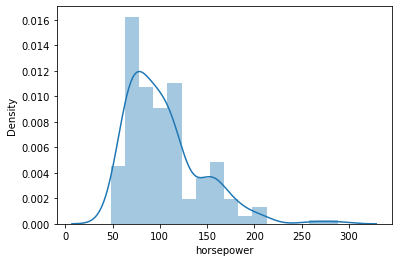

In [29]:
sns.distplot(df['horsepower'])

In [30]:
X = df.loc[:,['horsepower']]
print(X.head(3))
y = df.loc[:,['price']]
print(y.head(3))


   horsepower
0         111
1         111
2         154
     price
0  13495.0
1  16500.0
2  16500.0


In [31]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
# random-state = 42 : Same samples everytime , without shuffling the Data before Split . Ultimately leads to same output.

In [32]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(164, 1)
(164, 1)
(41, 1)
(41, 1)


In [33]:
from sklearn import linear_model #Parametric Model
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
print('Coefficients', regr.coef_)
print('Intercept',regr.intercept_)
y_pred = regr.predict(X_test)

Coefficients [[142.70245986]]
Intercept [-1791.70024613]


### Very less accuracy 45%

In [36]:
#Evaluation
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_test, y_pred))

0.5804427786296484


### Here the model is not learning completely , just learning 60%

In [37]:
y_pred_train = regr.predict(X_train)
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_train, y_pred_train))

0.5708964730019481


In [38]:
### Let us Do normalization of both and then test the same linear regression model above
#Normalization both input & output
from sklearn.preprocessing import Normalizer

df_n = Normalizer().fit_transform(df.loc[:,['horsepower','price']])
df_n = pd.DataFrame(df_n)
df_n.rename(columns = {0:'horsepower',1:'price'}, inplace = True)
print(df_n)

     horsepower     price
0      0.008225  0.999966
1      0.006727  0.999977
2      0.009333  0.999956
3      0.007312  0.999973
4      0.006590  0.999978
..          ...       ...
200    0.006767  0.999977
201    0.008401  0.999965
202    0.006237  0.999981
203    0.004717  0.999989
204    0.005039  0.999987

[205 rows x 2 columns]


In [39]:
X = df_n.loc[:,['horsepower']]
print(X.head(3))
y = df_n.loc[:,['price']]
print(y.head(3))

   horsepower
0    0.008225
1    0.006727
2    0.009333
      price
0  0.999966
1  0.999977
2  0.999956


In [40]:
#Splitting the data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

reg = linear_model.LinearRegression()

In [41]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(164, 1)
(164, 1)
(41, 1)
(41, 1)


In [42]:
print(reg.fit(X_train, y_train))
print('Coefficients', reg.coef_)
print('Intercept',reg.intercept_)
#Testing
y_pred = reg.predict(X_test)

LinearRegression()
Coefficients [[-0.00963235]]
Intercept [1.0000428]


### Very high accuracy after normalization 96%

In [43]:
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_test, y_pred))

0.9751455051100762


### But model is learning low 92%

In [44]:
y_pred_train = reg.predict(X_train)
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_train, y_pred_train))

0.9209628917683608


# RFE technique

In [45]:
X = df.iloc[:,18:-1]
print(X.head(3))
y = df.iloc[:,-1]
print(y.head(3))

   bore  stroke  compression-ratio  horsepower  peak-rpm  city-mpg  \
0  3.47    2.68                9.0         111      5000        21   
1  3.47    2.68                9.0         111      5000        21   
2  2.68    3.47                9.0         154      5000        19   

   highway-mpg  
0           27  
1           27  
2           26  
0    13495.0
1    16500.0
2    16500.0
Name: price, dtype: float64


In [46]:
from sklearn.feature_selection import RFE

logreg = linear_model.LinearRegression()
rfe = RFE(logreg, 2)
rfe = rfe.fit(X, y)

print(rfe.support_)
print(rfe.ranking_)

[ True False False False False False  True]
[1 4 2 5 6 3 1]


C:\Users\Ali\.conda\envs\tensor_ali\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [47]:
d = rfe.support_
print(d)
g = X.columns
print(g)
a = g[d]
print(a)
X_f = X[a]

[ True False False False False False  True]
Index(['bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm',
       'city-mpg', 'highway-mpg'],
      dtype='object')
Index(['bore', 'highway-mpg'], dtype='object')


In [48]:
X_f

,bore,highway-mpg
0,3.47,27
1,3.47,27
2,2.68,26
3,3.19,30
4,3.19,22
...,...,...
200,3.78,28
201,3.78,25
202,3.58,23
203,3.01,27


In [72]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_f,y, test_size = 0.2)

reg = linear_model.LinearRegression()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(164, 2)
(164, 1)
(41, 2)
(41, 1)


In [73]:
print(reg.fit(X_train, y_train))
print('Coefficients', reg.coef_)
print('Intercept',reg.intercept_)
#Testing
y_pred = reg.predict(X_test)
y_pred_train = reg.predict(X_train)

LinearRegression()
Coefficients [[ 0.18151255 -0.01444436]]
Intercept [0.04585361]


### RFE is somewhat 51% on 2 best matches ( bore , highway-mpg ) . I don't know why it is using these columns

In [74]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_train, y_pred_train))

0.01718743373603733
0.4832673454375467


In [52]:
df['city-mpg'].corr(df['price'])

-0.6676416867712723

In [53]:
X,y = np.arange(10,20).reshape((5,2)), range(50,60)
print(f'this is X : {X}')
print(f'this is y : {y}')

this is X : [[10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]]
this is y : range(50, 60)


In [54]:
print(list(y))

[50, 51, 52, 53, 54, 55, 56, 57, 58, 59]


# Linear regression with Gradient decent

In [168]:
from sklearn.preprocessing import minmax_scale

df_n = minmax_scale(df.loc[:,['horsepower','price']])#.fit_transform(df.loc[:,['horsepower','price']])
df_n = pd.DataFrame(df_n)
df_n.rename(columns = {0:'horsepower',1:'price'}, inplace = True)
print(df_n)
df['horsepower'] = df['horsepower'].astype('float64')

     horsepower     price
0      0.262500  0.207959
1      0.262500  0.282558
2      0.441667  0.282558
3      0.225000  0.219254
4      0.279167  0.306142
..          ...       ...
200    0.275000  0.291123
201    0.466667  0.345738
202    0.358333  0.406311
203    0.241667  0.430763
204    0.275000  0.434611

[205 rows x 2 columns]


In [169]:
X = df_n.loc[:,['horsepower']]
print(X.head(3))
Y = df_n.loc[:,['price']]
print(y.head(3))

   horsepower
0    0.262500
1    0.262500
2    0.441667
      price
0  0.207959
1  0.282558
2  0.282558


In [170]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2)

reg = linear_model.LinearRegression()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(164, 1)
(164, 1)
(41, 1)
(41, 1)


In [106]:

    m = 0
    c = 0

    L = 0.001
    epoch = 300

    n = float(len(X_train))

    # Performing Gradient descent
    for i in range(epoch):
        Y_pred = m*X_train + c
        D_m = (-2/n) * np.sum(X_train * (y_train - Y_pred)) 
        D_b = (-2/n) * np.sum(y_train - Y_pred)
        m = m - L * D_m  # Update m
        c = c - L * D_b  # Update c
    print(m , "---" , c)
    

horsepower    0.0
price         0.0
dtype: float64 --- horsepower    0.0
price         0.0
dtype: float64


In [116]:
X = X.values
Y  = Y.values


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [127]:
# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X_train)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X_train + c  # The current predicted value of Y
    D_m = (-2/n) * np.sum(X_train * (y_train - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * np.sum(y_train - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)
print(r2_score(y_train , Y_pred))

0.013528330862200172 0.036648632628314956
-0.6568564780188948


In [128]:
# making predictions
Y_pred = m*X_test + c

print(r2_score(y_test , Y_pred))

-0.7171992145629522


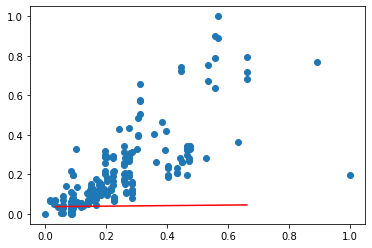

In [129]:
import matplotlib.pyplot as plt
plt.scatter(X, Y) 
plt.plot([min(X_test), max(X_test)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

In [176]:
def linear_regression(X, y, m_current=0, b_current=0, epochs=1000, learning_rate=0.0001):
     N = float(len(y))
     for i in range(epochs):
         y_current = (m_current * X) + b_current
         cost = sum([data**2 for data in (y-y_current)]) / N
         m_gradient = -(2/N) * sum(X * (y - y_current))
         b_gradient = -(2/N) * sum(y - y_current)
         m_current = m_current - (learning_rate * m_gradient)
         b_current = b_current - (learning_rate * b_gradient)
     return m_current, b_current, cost

In [178]:
arr = linear_regression(X_train.values , y_train.values)
arr

(array([0.01449563]), array([0.03744893]), array([0.06981563]))

[0.01449563] [0.03744893] [0.06981563]
-0.8902208585833995


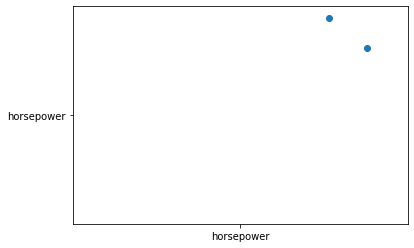

In [184]:
m,c,loss = arr[0] , arr[1] , arr[2]
print(m ,c ,loss)

Y_preeeed = ((m * X_test) + c)

print(r2_score(y_test , Y_preeeed))

plt.scatter(X_test, y_test) 
plt.plot([min(X_test), max(X_test)], [min(Y_preeeed), max(Y_preeeed)], color='red')  # regression line
plt.show()

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    int64  
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non